# LIS(longest increasing subsequence ) problem [question & clarifying question]:
 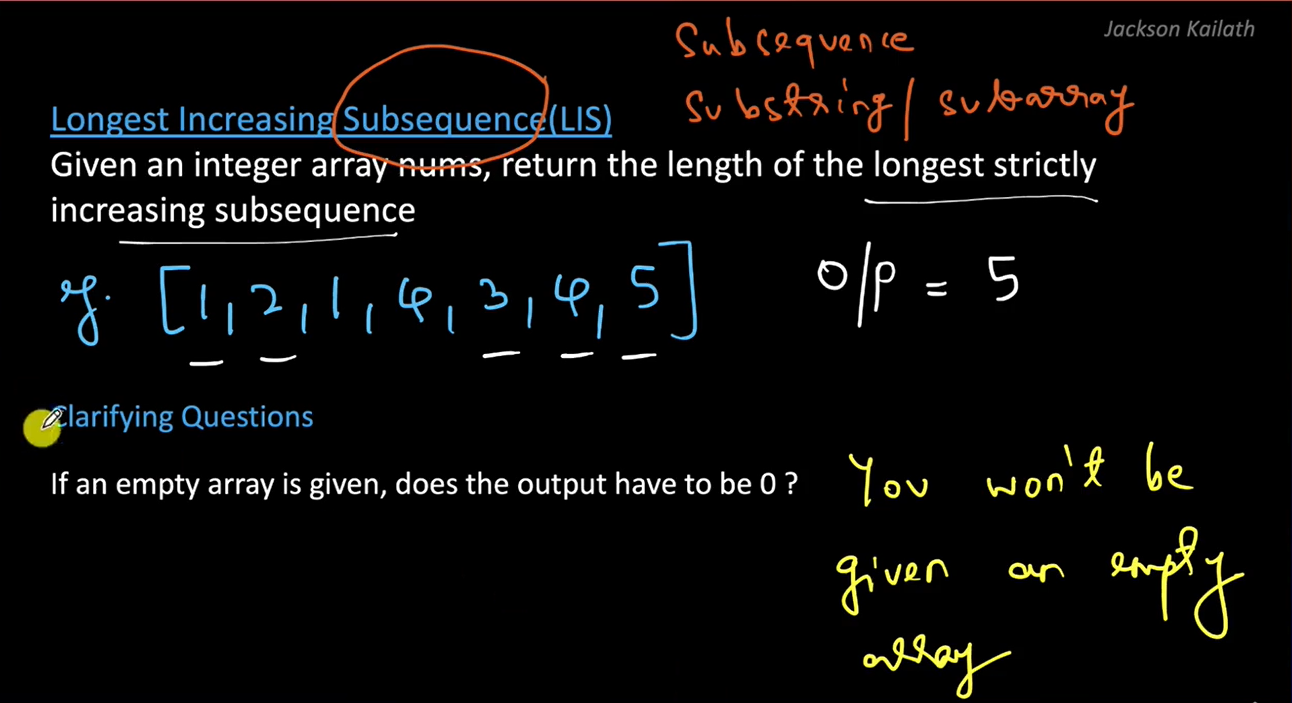
# LIS(longest increasing subsequence ) problem [test-cases]:
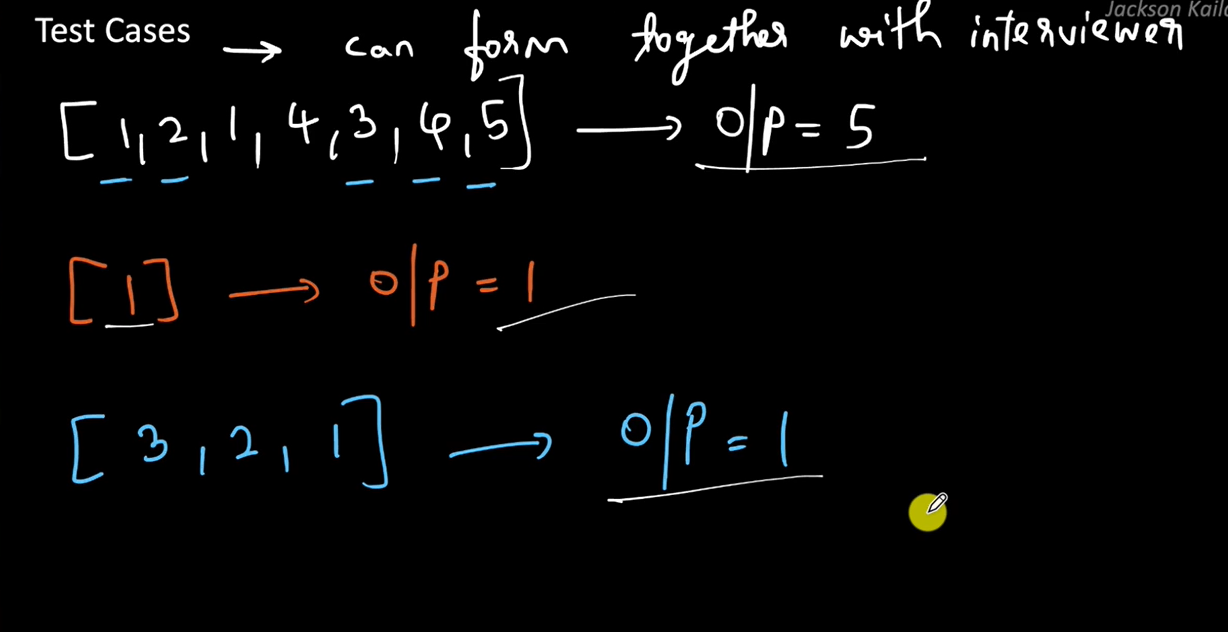
# Coding Exercise: LIS
### Given an integer array nums, return the length of the longest strictly increasing subsequence.

### Example 1:

- Input: nums = [300,9,2,5,3,7,500,400]
- Output: 4
### Explanation: The longest increasing subsequence is [2,3,7,500], therefore the length is 4.

# LIS(longest increasing subsequence ) problem [why it's Dynamic programming question or solved by DP]:
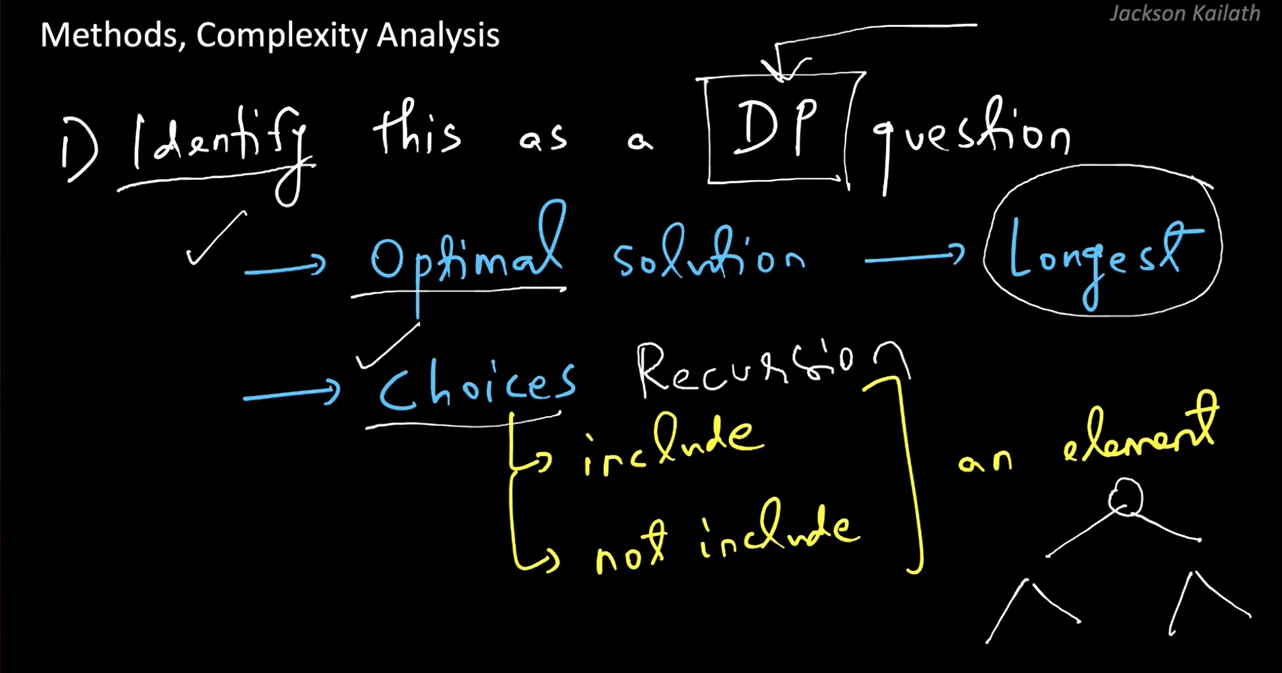
# LIS(longest increasing subsequence ) problem Tabulation(bottom-up)approach :
### Here first we have to create 2-D dp_table of dimension n+1 * n+1 (row * colm); where n is length of num-array.
### curr-indexes on row-side whereas prev-indexes on colmn-side
### in the dp_table as we do in the memoisation table as well here also we have to offset the prev indexes by 1 ; as prev will initialised with value -1

### row dnotes or represent the subproblem starting from corresponding index while having index of previously included element.
- here box at dp[2][1] representing the subproblem starting from curr[2] while have prev[1]=(prev-0; offset by 1) 
- means subproblem is : [3] num-array and '1' as prev-ele included  
- and we can include curr-value if curr-value is greater than prev 
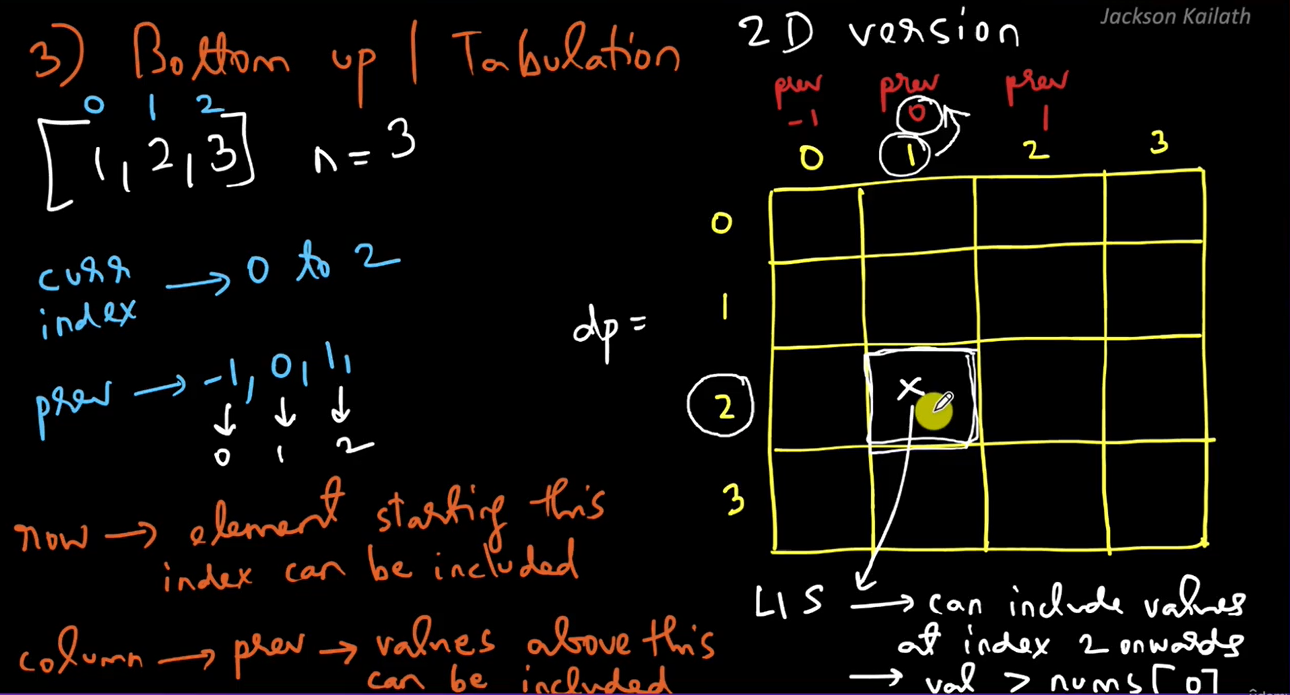
### 1. here at dp[2][2] representing the subproblem starting from curr[2]  and prev[2] which is actually prev[1] (offset):
- dp[2][2] subproblem = [3]  should be greater than 2

### 2. here at dp[2][1] representing the subproblem starting from curr[2]  and prev[1] which is actually prev[0] (offset):
- dp[2][1] subproblem = [3]  should be greater than 1

### 3. here at dp[2][0] representing the subproblem starting from curr[2]  and prev[0] which is actually prev[-1] (offset):
- dp[2][0] subproblem = [3]  should be greater than none [as no prev included yet]

### 4. here at dp[1][2] representing the subproblem starting from curr[1]  and prev[2] which is actually prev[1] (offset):
- dp[1][2] subproblem = [2,3]  should be greater than 2   ; so this will be treated as DEAD becuse prev and curr both are at '2'

### 5. here at dp[1][1] representing the subproblem starting from curr[1]  and prev[1] which is actually prev[0] (offset):
- dp[1][1] subproblem = [2,3]  should be greater than 1 

### 6. here at dp[1][0] representing the subproblem starting from curr[1]  and prev[0] which is actually prev[-1] (offset):
- dp[1][0] subproblem = [2,3]  should be greater than none [as no prev included yet]

### 7. here at dp[0][2] representing the subproblem starting from curr[0]  and prev[2] which is actually prev[1] (offset):
- dp[0][2] subproblem = [1,2,3]  should be greater than 2 ; so this will be treated as DEAD becuse prev here is forward wrt curr

### 8. here at dp[0][1] representing the subproblem starting from curr[0]  and prev[1] which is actually prev[0] (offset):
- dp[0][1] subproblem = [1,2,3]  should be greater than 1; so this will be treated as DEAD becuse prev and curr both are at '1'

### 9. here at dp[0][0] representing the subproblem starting from curr[0]  and prev[0] which is actually prev[-1] (offset):
- dp[0][0] subproblem = [1,2,3]  should be greater than none; [as no prev included yet]   
- // actually if you look at this dp[0][0] it's actual major problem at hand , and cell's value at this indexes are major solution to the problem at hand.

- [note] here at dp_table row-3 and colmn-3 are base conditioned row and colm [this is exactly where indexes reached beyond last element of num-array]
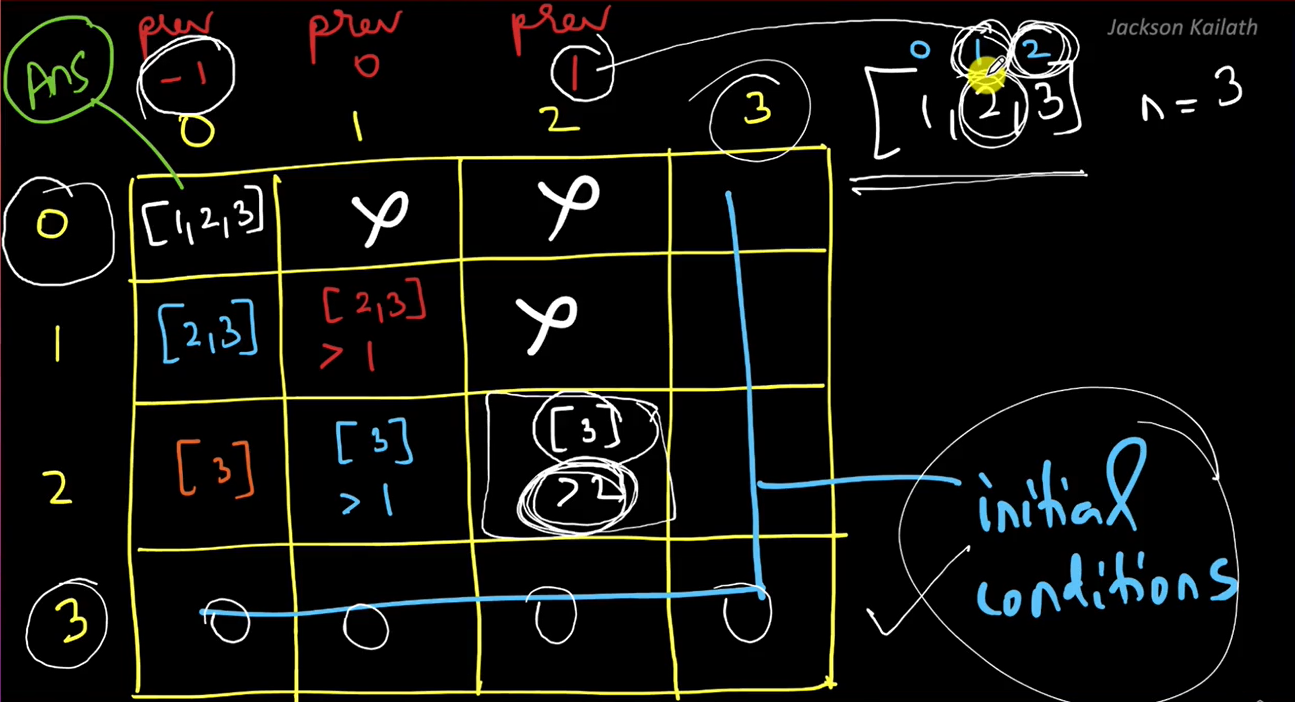

### Exclusion:
- concept: while excluding the curr-ele , we move curr-index to the next and prev-index remained same , without adding 1 length 
- dp_formula(exclude): dp[curr+1][prev+1]   // here we used 'prev+1'(instead of prev) as it should be offsetted by 1 

### inclusion:  (checking before include curr-ele that num[curr] > num[prev])
- concept: while including the curr-ele , we move curr-index to the next and prev-index will be equal to curr-index , with adding 1 length 
- dp_formula(include): 1 + dp[curr+1][curr+1]   // here we used 'curr+1'(instead of curr) as it(prev's index) should be offsetted by 1 

### finally we have to choose maximum-lengthed increasing subsequence among [Exclusion & Inclusion]-branches subsequences
- dp[i][j] =  max(exclude , include)  

### Major solution to the problem at hand will be at far-left-top ; dp[0][0] 
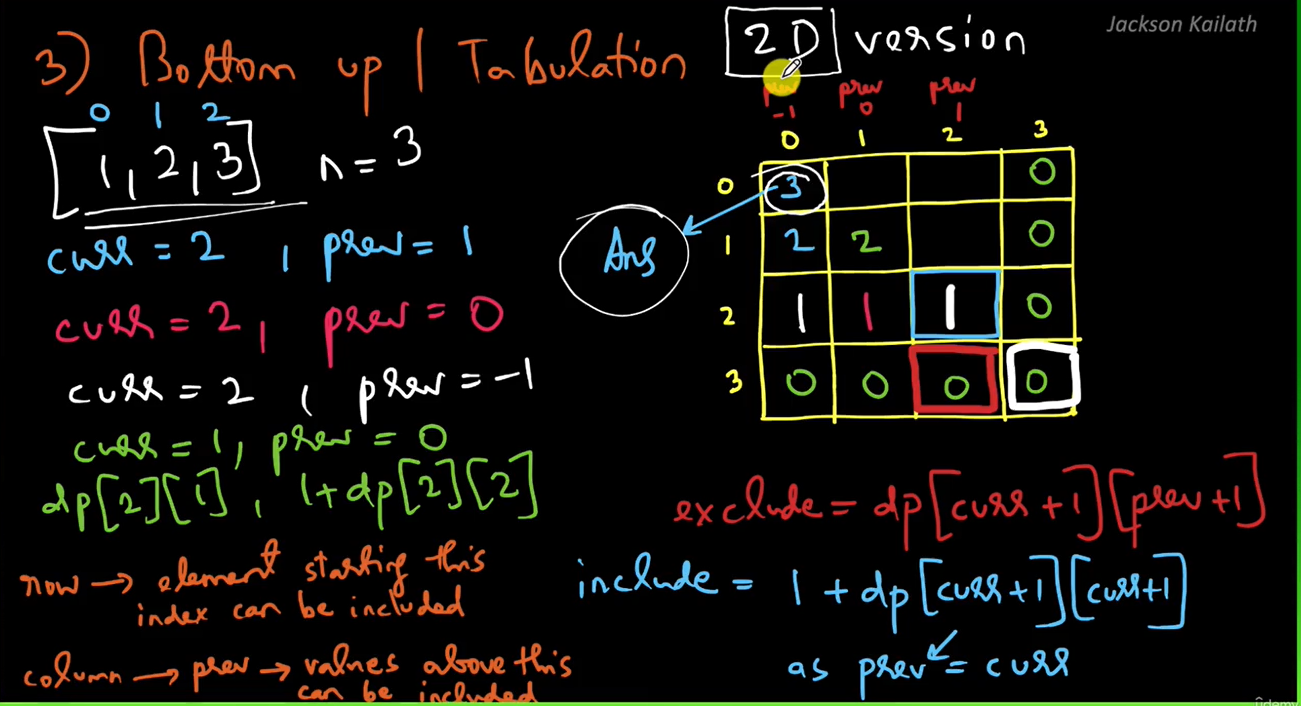
# LIS(longest increasing subsequence ) problem Tabulation(bottom-up)approach[complexity analysis] :
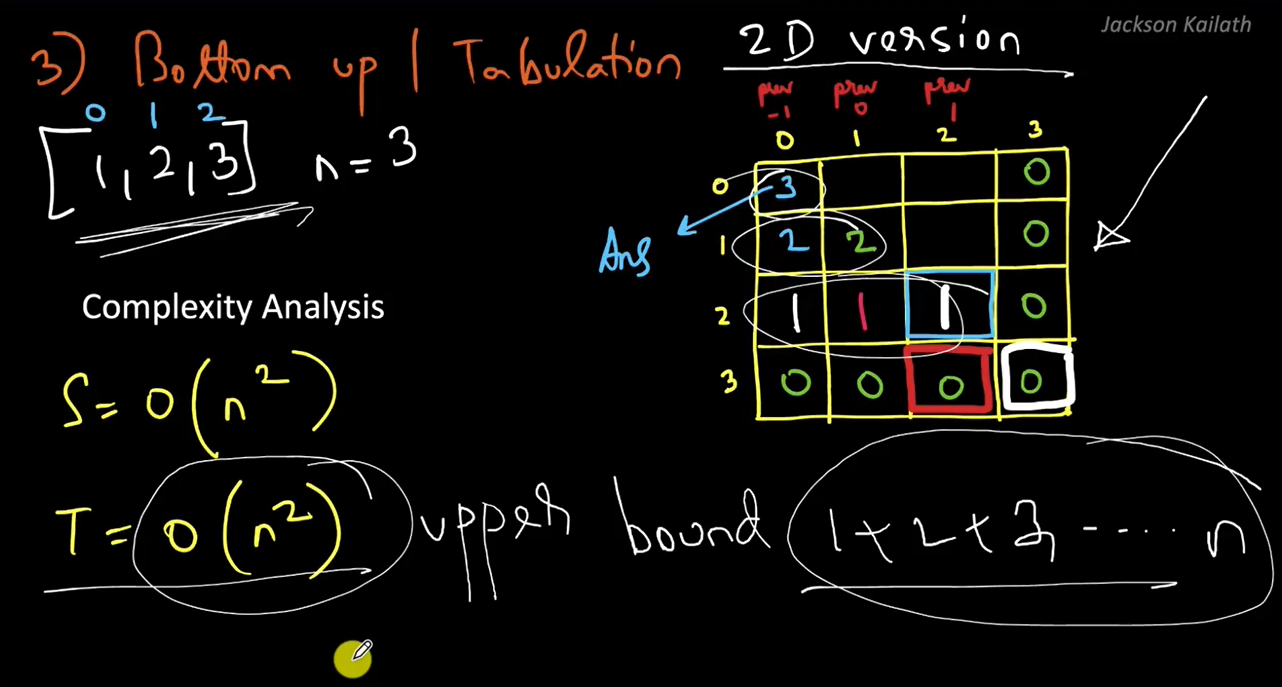
# LIS(longest increasing subsequence ) problem Tabulation(bottom-up)approach[code implementation] :
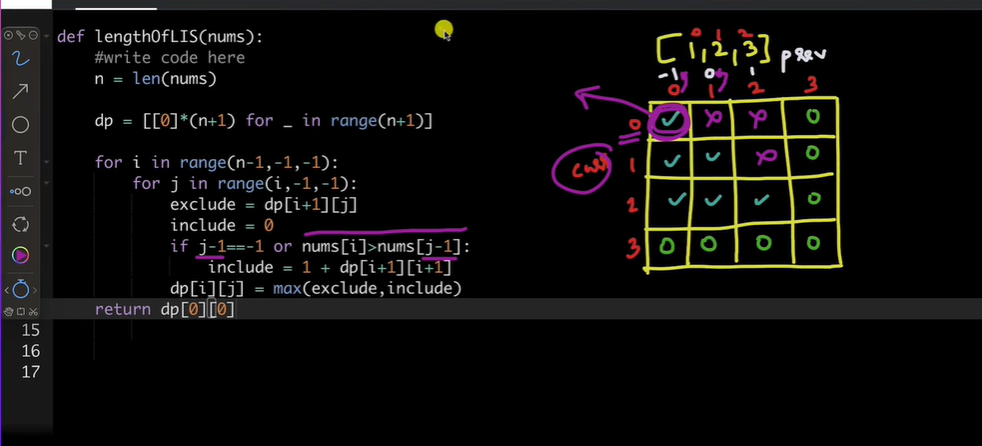

In [1]:
# longest increasing subsequence problem solving through tabulation(bottom-up) approach [2-D table]:
def lengthOfLIS(nums):
    n = len(nums)  # length of num-array
    #constructing 2-d dp_table with row & colm = (n+1, n+1)
    dp = [[0]*(n+1) for _ in range(n+1)]  # all cells initiased with 0 here 
#as we know the base-conditioned row & column should be remained zero dp[n][*]=0 & dp[*][n]= 0
# so we start filling-up cell iteratively from row- n-1 to down-to zero ; from colm- n-1 to down-to zero 
    for i in range(n-1,-1,-1):  # for row: from n-1 to down-to zero(-1)
        for j in range(i,-1,-1): ## for colm: from n-1(same as ongoing 'i') to down-to zero(-1)
            exclude = dp[i+1][j]  # exclude formula: index of curr moved to the next while remaining index of prev constant  (used here j+1 instead of j ; as it should be offsetted by 1); without adding 1 
            include = 0  # intialise include here for comparison purposes
            if j-1 ==-1 or nums[i]>nums[j-1]:   # condition checking whetehr prev == -1(which denotes no prev included yet) 
                                       #and comparing that 'curr' should be greater than 'prev' : num[i]>prev[i-1]
                include = 1 + dp[i+1][i+1] #include formula: index of curr moved to the next while index of prev equals to index of curr  (used here 'i+1' instead of 'i' ; as it(prev) should be offsetted by 1); with adding 1 
            dp[i][j] = max(exclude,include)
    return dp[0][0]  ## Major solution to the problem at hand will be at far-left-top ; dp[0][0] 
#example usage:
n= [1,2,1,4,3,4,5]
print(lengthOfLIS(n))# should be 5 LIS

n1 = [300,9,2,5,3,7,500,400]
print(lengthOfLIS(n1))# should be 4 LIS

5
4
